In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
dataset = pd.read_csv('dataset/Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [10]:
y.shape

(10,)

In [11]:
y = y.reshape(len(y), 1)

In [16]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [17]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [24]:
input_x = sc_x.fit_transform([[6.5]])

In [26]:
sc_y.inverse_transform(regressor.predict(input_x).reshape(-1,1))

array([[131106.77303274]])

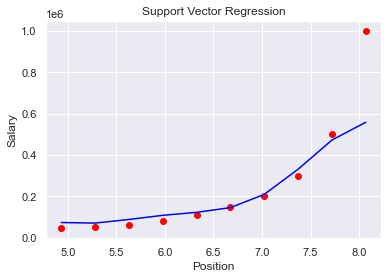

In [28]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()